In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/200-bird-species-with-11788-images/segmentations.tgz
/kaggle/input/200-bird-species-with-11788-images/CUB_200_2011.tgz


In [2]:
import tarfile

# Path to the .tgz file
tgz_file_path = "/kaggle/input/200-bird-species-with-11788-images/CUB_200_2011.tgz"

# Extract the .tgz file
with tarfile.open(tgz_file_path, "r:gz") as tar:
    tar.extractall(path="./")  # Specify the destination folder
tgz_file_path = "/kaggle/input/200-bird-species-with-11788-images/segmentations.tgz"

# Extract the .tgz file
with tarfile.open(tgz_file_path, "r:gz") as tar:
    tar.extractall(path="./")  # Specify the destination folder

print("Extraction complete.")

Extraction complete.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
import os

# Path to the parent directory
parent_directory = '/kaggle/working/CUB_200_2011/images'

# List of directories inside the parent directory
directories = [d for d in os.listdir(parent_directory) if os.path.isdir(os.path.join(parent_directory, d))]

directories = sorted(directories)
print(directories)

['001.Black_footed_Albatross', '002.Laysan_Albatross', '003.Sooty_Albatross', '004.Groove_billed_Ani', '005.Crested_Auklet', '006.Least_Auklet', '007.Parakeet_Auklet', '008.Rhinoceros_Auklet', '009.Brewer_Blackbird', '010.Red_winged_Blackbird', '011.Rusty_Blackbird', '012.Yellow_headed_Blackbird', '013.Bobolink', '014.Indigo_Bunting', '015.Lazuli_Bunting', '016.Painted_Bunting', '017.Cardinal', '018.Spotted_Catbird', '019.Gray_Catbird', '020.Yellow_breasted_Chat', '021.Eastern_Towhee', '022.Chuck_will_Widow', '023.Brandt_Cormorant', '024.Red_faced_Cormorant', '025.Pelagic_Cormorant', '026.Bronzed_Cowbird', '027.Shiny_Cowbird', '028.Brown_Creeper', '029.American_Crow', '030.Fish_Crow', '031.Black_billed_Cuckoo', '032.Mangrove_Cuckoo', '033.Yellow_billed_Cuckoo', '034.Gray_crowned_Rosy_Finch', '035.Purple_Finch', '036.Northern_Flicker', '037.Acadian_Flycatcher', '038.Great_Crested_Flycatcher', '039.Least_Flycatcher', '040.Olive_sided_Flycatcher', '041.Scissor_tailed_Flycatcher', '042.Ver

In [5]:
from PIL import Image

def mask_image(directories):
    os.makedirs('/kaggle/working/Masked_Images', exist_ok=True)
    
    for directory in directories:
        img_directory = f'/kaggle/working/CUB_200_2011/images/{directory}'
        print(img_directory)
        img_files = sorted(os.listdir(img_directory))
        jpg_files = [img for img in img_files if img.endswith('.jpg')]
        seg_directory = f'/kaggle/working/segmentations/{directory}' 
        seg_files = sorted(os.listdir(seg_directory))
        png_files = [img for img in seg_files if img.endswith('.png')]
        jpg_files = sorted(jpg_files)
        png_files = sorted(png_files)
        indexes = np.arange(len(jpg_files))
        np.random.shuffle(indexes)

        # Calculate the split point for 80:20
        split_point = int(0.8 * len(jpg_files))

        # Divide the indexes into 80:20
        train_indexes = indexes[:split_point]
        test_indexes = indexes[split_point:]

        train_split_point = int(0.75 * len(train_indexes))
        train_subset = train_indexes[:train_split_point]
        validation_subset = train_indexes[train_split_point:]

        print("Train indexes:", train_subset)
        print("Validation indexes:", validation_subset)
        print("Test indexes:", test_indexes)
        split_indexes = [train_subset,validation_subset,test_indexes]
        split_dir = ['train','valid','test']
        jpg_array = np.array(jpg_files)
        png_array = np.array(png_files)
        for i in range(3):
            masked_image_count = 0
            for jpg_file,png_file in zip(jpg_array[split_indexes[i]],png_array[split_indexes[i]]):
            # Load the original image and mask using Pillow
                image = Image.open(f'/kaggle/working/CUB_200_2011/images/{directory}/{jpg_file}')
                mask = Image.open(f'/kaggle/working/segmentations/{directory}/{png_file}').convert('L')  # Convert mask to grayscale

                # Ensure the mask has the same size as the image
                mask = mask.resize(image.size)

                # Convert the images to NumPy arrays
                image_array = np.array(image)
                mask_array = np.array(mask)

                # Normalize the mask to be in the range of [0, 1]
                mask_array = mask_array / 255.0

                # Ensure the mask has the correct shape (broadcastable)
                if len(image_array.shape) == 3:
                    mask_array = np.expand_dims(mask_array, axis=-1)

                # Apply the mask to the image
                masked_image_array = image_array * mask_array

                # Convert the result back to a PIL Image
                masked_image = Image.fromarray(np.uint8(masked_image_array))

                # Optionally save the result
                os.makedirs(f'/kaggle/working/Masked_Images/{split_dir[i]}/{directory}', exist_ok=True)
                masked_image.save(f'/kaggle/working/Masked_Images/{split_dir[i]}/{directory}/{jpg_file}')
                masked_image_count += 1
                print(f'Masking {jpg_file} {split_dir[i]} completed - {masked_image_count}')

mask_image(directories)

/kaggle/working/CUB_200_2011/images/001.Black_footed_Albatross
Train indexes: [19 51 12 56 30  3  5 26  1 31 45 42 22 43 50 38 41 10 18 46  6 34 11 35
 17 59 52  7 48 33 37 27 24 32 15 49]
Validation indexes: [ 8 55 47 58 20  0 28 40 23  4 16 53]
Test indexes: [44  2 39 13 14 36 21 54 25 29  9 57]
Masking Black_Footed_Albatross_0033_796086.jpg train completed - 1
Masking Black_Footed_Albatross_0079_796122.jpg train completed - 2
Masking Black_Footed_Albatross_0019_796104.jpg train completed - 3
Masking Black_Footed_Albatross_0086_796062.jpg train completed - 4
Masking Black_Footed_Albatross_0047_796064.jpg train completed - 5
Masking Black_Footed_Albatross_0005_796090.jpg train completed - 6
Masking Black_Footed_Albatross_0007_796138.jpg train completed - 7
Masking Black_Footed_Albatross_0041_796108.jpg train completed - 8
Masking Black_Footed_Albatross_0002_55.jpg train completed - 9
Masking Black_Footed_Albatross_0049_796063.jpg train completed - 10
Masking Black_Footed_Albatross_006

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Found 7045 images belonging to 200 classes.
Found 7045 images belonging to 200 classes.
Found 7045 images belonging to 200 classes.


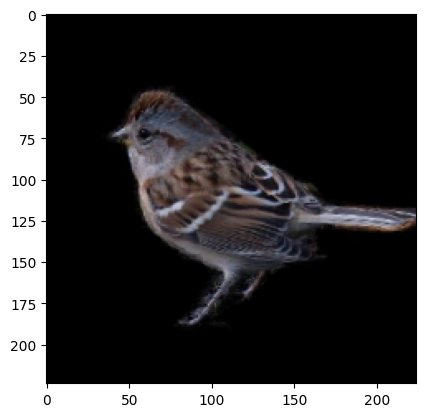

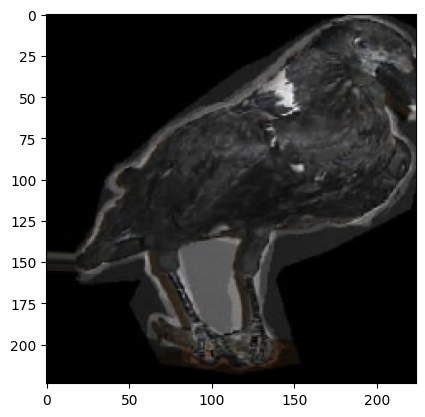

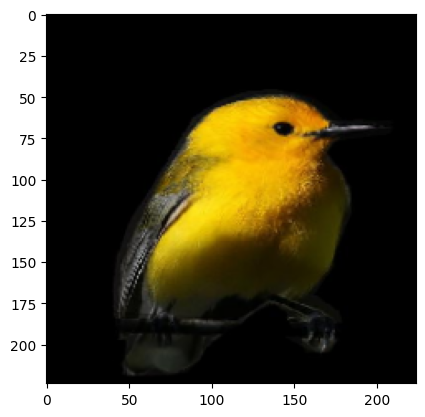

In [7]:
import scipy
BS = 32
image_size = (224,224)
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    './Masked_Images/train',
    target_size= image_size,
    batch_size=BS,
    class_mode='categorical',
    color_mode='rgb')

valid_generator = valid_datagen.flow_from_directory(
    './Masked_Images/train',
    target_size= image_size,
    batch_size=BS,
    class_mode='categorical',
    color_mode='rgb')

test_generator = valid_datagen.flow_from_directory(
    './Masked_Images/train',
    target_size= image_size,
    batch_size=BS,
    class_mode='categorical',
    color_mode='rgb')

for _ in range(3):
    img, label = next(train_generator)
    plt.imshow(img[0])
    plt.show()

In [8]:
from tensorflow.keras.applications import VGG16

# Load VGG16 pretrained model
vgg16_model = VGG16(input_shape=(224, 224, 3), 
                    include_top=False, 
                    weights='imagenet')
vgg16_model.trainable = False  # Freeze the base model

# Build Sequential model
model_vgg16 = keras.Sequential([
    vgg16_model,
    layers.Flatten(),
    layers.Dense(units=1950, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(units=200, activation='softmax')
])

model_vgg16.summary()

# Compile model
model_vgg16.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=10)

# Fit the model
history = model_vgg16.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=100,
    verbose=1,
    callbacks=[early_stop]
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/100


I0000 00:00:1727984886.582760      88 service.cc:145] XLA service 0x7ec64400ad20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727984886.582827      88 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  2/221 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.0078 - loss: 6.5368     

I0000 00:00:1727984895.950066      88 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


221/221 ━━━━━━━━━━━━━━━━━━━━ 104s 401ms/step - accuracy: 0.0630 - loss: 5.3337 - val_accuracy: 0.1842 - val_loss: 4.7352
Epoch 2/100


I0000 00:00:1727984984.158573      90 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_6', 8 bytes spill stores, 8 bytes spill loads



221/221 ━━━━━━━━━━━━━━━━━━━━ 87s 384ms/step - accuracy: 0.3080 - loss: 2.9953 - val_accuracy: 0.2835 - val_loss: 3.6954
Epoch 3/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 87s 383ms/step - accuracy: 0.4414 - loss: 2.2341 - val_accuracy: 0.5561 - val_loss: 1.7718
Epoch 4/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 87s 384ms/step - accuracy: 0.5191 - loss: 1.8627 - val_accuracy: 0.5872 - val_loss: 1.6599
Epoch 5/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 88s 387ms/step - accuracy: 0.5721 - loss: 1.6275 - val_accuracy: 0.7279 - val_loss: 1.0060
Epoch 6/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 87s 382ms/step - accuracy: 0.6319 - loss: 1.3930 - val_accuracy: 0.7398 - val_loss: 0.9628
Epoch 7/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 87s 381ms/step - accuracy: 0.6439 - loss: 1.3106 - val_accuracy: 0.7187 - val_loss: 1.0163
Epoch 8/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 86s 381ms/step - accuracy: 0.6972 - loss: 1.0870 - val_accuracy: 0.7145 - val_loss: 1.0478
Epoch 9/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 86s 382ms/step - accuracy: 0.7040 - loss: 1.076

In [9]:
model_vgg16.evaluate(test_generator)

221/221 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.9878 - loss: 0.0367


[0.037622325122356415, 0.9887863993644714]

In [10]:
model_vgg16.save('bird_CNN_model_vgg16.h5')

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_resnet_v2             │ ?                      │    54,336,736 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_204         │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,336,736 (207.28 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 54,336,736 (207.28 MB)

Epoch 1/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 145s 507ms/step - accuracy: 0.1099 - loss: 5.1494 - val_accuracy: 0.2947 - val_loss: 3.2362
Epoch 2/100


I0000 00:00:1727991902.572210      89 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_6', 8 bytes spill stores, 8 bytes spill loads



221/221 ━━━━━━━━━━━━━━━━━━━━ 110s 412ms/step - accuracy: 0.2978 - loss: 3.0785 - val_accuracy: 0.4368 - val_loss: 2.2133
Epoch 3/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 93s 411ms/step - accuracy: 0.3980 - loss: 2.4055 - val_accuracy: 0.5126 - val_loss: 1.8895
Epoch 4/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 93s 410ms/step - accuracy: 0.4555 - loss: 2.1011 - val_accuracy: 0.5820 - val_loss: 1.5250
Epoch 5/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 94s 414ms/step - accuracy: 0.5043 - loss: 1.8032 - val_accuracy: 0.5892 - val_loss: 1.4364
Epoch 6/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 93s 412ms/step - accuracy: 0.5416 - loss: 1.6605 - val_accuracy: 0.6600 - val_loss: 1.2199
Epoch 7/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 94s 413ms/step - accuracy: 0.5706 - loss: 1.5083 - val_accuracy: 0.6846 - val_loss: 1.0719
Epoch 8/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 93s 411ms/step - accuracy: 0.6122 - loss: 1.3630 - val_accuracy: 0.6842 - val_loss: 1.0662
Epoch 9/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 93s 412ms/step - accuracy: 0.6304 - loss: 1.27

Text(0.5, 1.0, 'Loss')

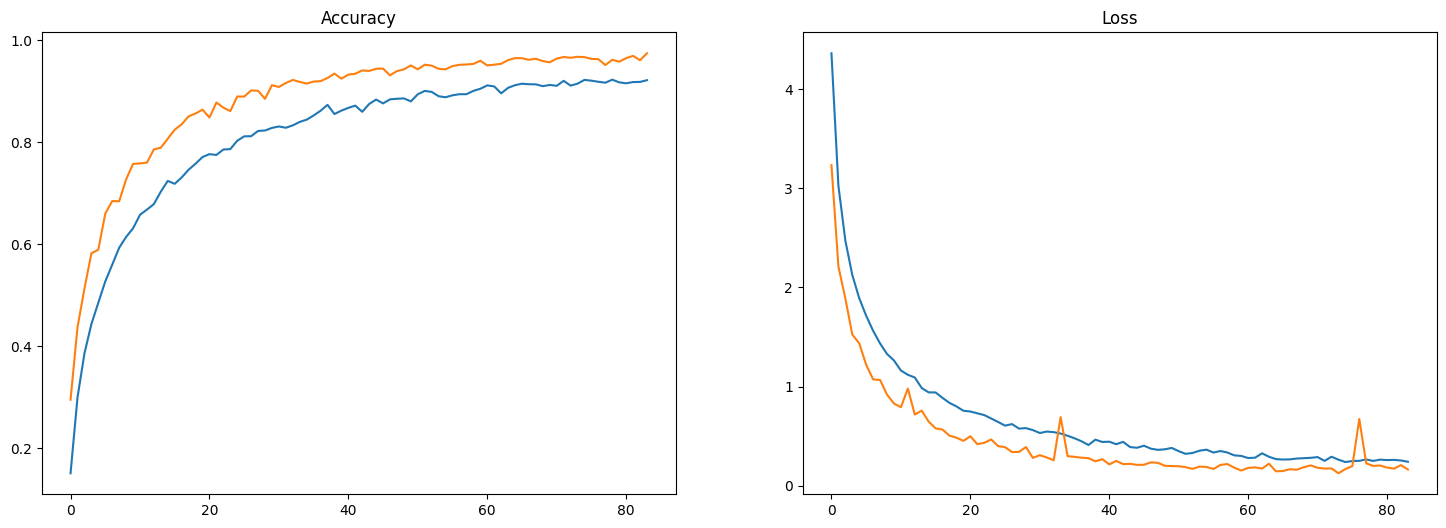

In [11]:
#model

resnet_model=tf.keras.applications.InceptionResNetV2(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')
resnet_model.trainable = False


model_resnet = keras.Sequential([  
    resnet_model,
    layers.Flatten(),
    layers.Dense(units=1950,activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(units=200, activation="softmax"),
])
model_resnet.summary()

model_resnet.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#fit

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=10)

history = model_resnet.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=100,
    verbose=1,
    callbacks=[early_stop]
)

result=pd.DataFrame(history.history)
fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(18,6))
ax=ax.flatten()
ax[0].plot(result[['accuracy','val_accuracy']])
ax[0].set_title("Accuracy")
ax[1].plot(result[['loss','val_loss']])
ax[1].set_title("Loss")

In [12]:
model_resnet.evaluate(test_generator)

221/221 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9707 - loss: 0.1600


[0.16217303276062012, 0.974733829498291]

In [13]:
model_resnet.save('bird_CNN_model_resnet.h5')

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ ?                      │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_205         │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 137s 461ms/step - accuracy: 0.0055 - loss: 5.8063 - val_accuracy: 0.0051 - val_loss: 19.8327
Epoch 2/100


I0000 00:00:1727999948.264035      89 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_20', 8 bytes spill stores, 8 bytes spill loads



221/221 ━━━━━━━━━━━━━━━━━━━━ 84s 368ms/step - accuracy: 0.0055 - loss: 5.6871 - val_accuracy: 0.0051 - val_loss: 13.5670
Epoch 3/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 83s 366ms/step - accuracy: 0.0047 - loss: 5.6251 - val_accuracy: 0.0051 - val_loss: 16.0219
Epoch 4/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 83s 364ms/step - accuracy: 0.0049 - loss: 5.5898 - val_accuracy: 0.0051 - val_loss: 16.9055
Epoch 5/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 82s 361ms/step - accuracy: 0.0047 - loss: 5.5999 - val_accuracy: 0.0051 - val_loss: 5.5738
Epoch 6/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 83s 364ms/step - accuracy: 0.0063 - loss: 5.5542 - val_accuracy: 0.0050 - val_loss: 5.6094
Epoch 7/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 143s 370ms/step - accuracy: 0.0040 - loss: 5.5387 - val_accuracy: 0.0051 - val_loss: 10.1108
Epoch 8/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 82s 362ms/step - accuracy: 0.0039 - loss: 5.5075 - val_accuracy: 0.0051 - val_loss: 5.4251
Epoch 9/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 83s 364ms/step - accuracy: 0.0053 - loss: 

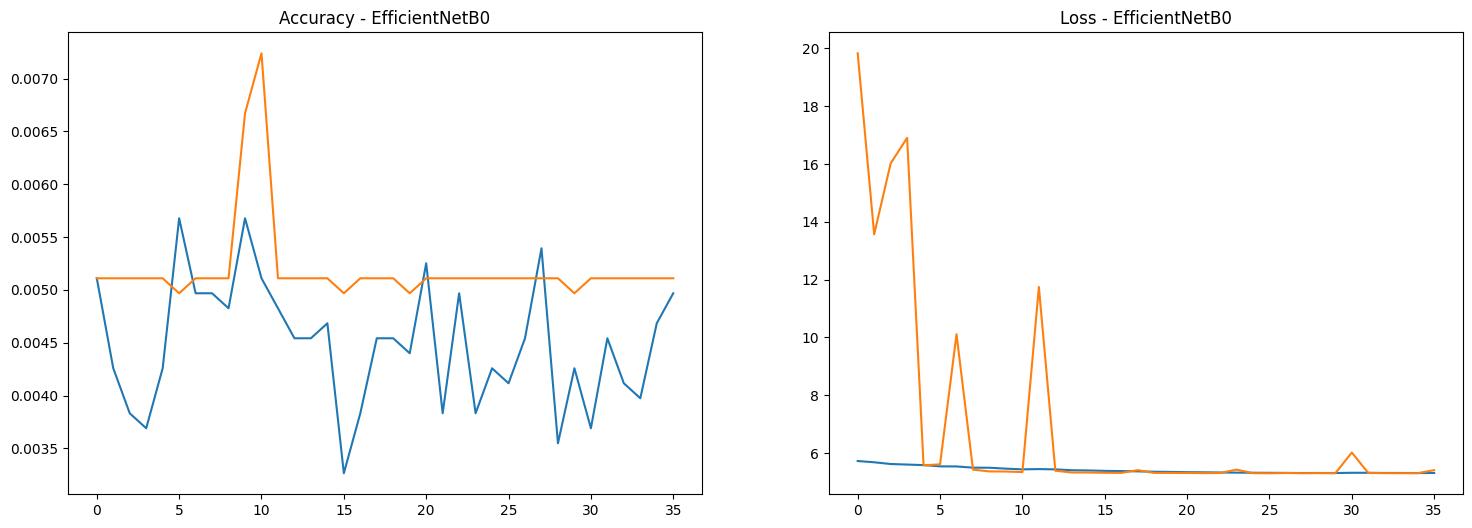

In [14]:
from tensorflow.keras.applications import EfficientNetB0

# Load the EfficientNetB0 model
efficientnet_model = EfficientNetB0(input_shape=(224, 224, 3),
                                    include_top=False,
                                    weights='imagenet')

# Freeze the pre-trained model
efficientnet_model.trainable = False

# Create a Sequential model and add layers
model_efficientnet = keras.Sequential([
    efficientnet_model,
    layers.Flatten(),
    layers.Dense(units=1950, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(units=200, activation='softmax'),
])

model_efficientnet.summary()

# Compile the model
model_efficientnet.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=10)
# Fit the model
history_efficientnet = model_efficientnet.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=100,
    verbose=1,
    callbacks=[early_stop]
)

# Plot results
result_efficientnet = pd.DataFrame(history_efficientnet.history)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
ax = ax.flatten()
ax[0].plot(result_efficientnet[['accuracy', 'val_accuracy']])
ax[0].set_title("Accuracy - EfficientNetB0")
ax[1].plot(result_efficientnet[['loss', 'val_loss']])
ax[1].set_title("Loss - EfficientNetB0")
plt.show()

In [15]:
model_efficientnet.evaluate(test_generator)

221/221 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.0056 - loss: 5.4126


[5.408102989196777, 0.005110007245093584]

In [16]:
model_efficientnet.save('bird_CNN_model_efficientnet.h5')

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ ?                      │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_300         │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 114s 423ms/step - accuracy: 0.1312 - loss: 4.8194 - val_accuracy: 0.4139 - val_loss: 2.5332
Epoch 2/100


I0000 00:00:1728003069.259348      88 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_6', 8 bytes spill stores, 8 bytes spill loads



221/221 ━━━━━━━━━━━━━━━━━━━━ 85s 374ms/step - accuracy: 0.4021 - loss: 2.4125 - val_accuracy: 0.5287 - val_loss: 1.8136
Epoch 3/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 84s 368ms/step - accuracy: 0.5421 - loss: 1.7595 - val_accuracy: 0.6071 - val_loss: 1.4185
Epoch 4/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 85s 372ms/step - accuracy: 0.5888 - loss: 1.4766 - val_accuracy: 0.6757 - val_loss: 1.1573
Epoch 5/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 84s 369ms/step - accuracy: 0.6550 - loss: 1.2277 - val_accuracy: 0.7439 - val_loss: 0.8589
Epoch 6/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 83s 364ms/step - accuracy: 0.6980 - loss: 1.0634 - val_accuracy: 0.7945 - val_loss: 0.7031
Epoch 7/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 83s 366ms/step - accuracy: 0.7433 - loss: 0.8938 - val_accuracy: 0.7994 - val_loss: 0.6809
Epoch 8/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 84s 370ms/step - accuracy: 0.7402 - loss: 0.8969 - val_accuracy: 0.8335 - val_loss: 0.5441
Epoch 9/100
221/221 ━━━━━━━━━━━━━━━━━━━━ 84s 371ms/step - accuracy: 0.7793 - loss: 0.736

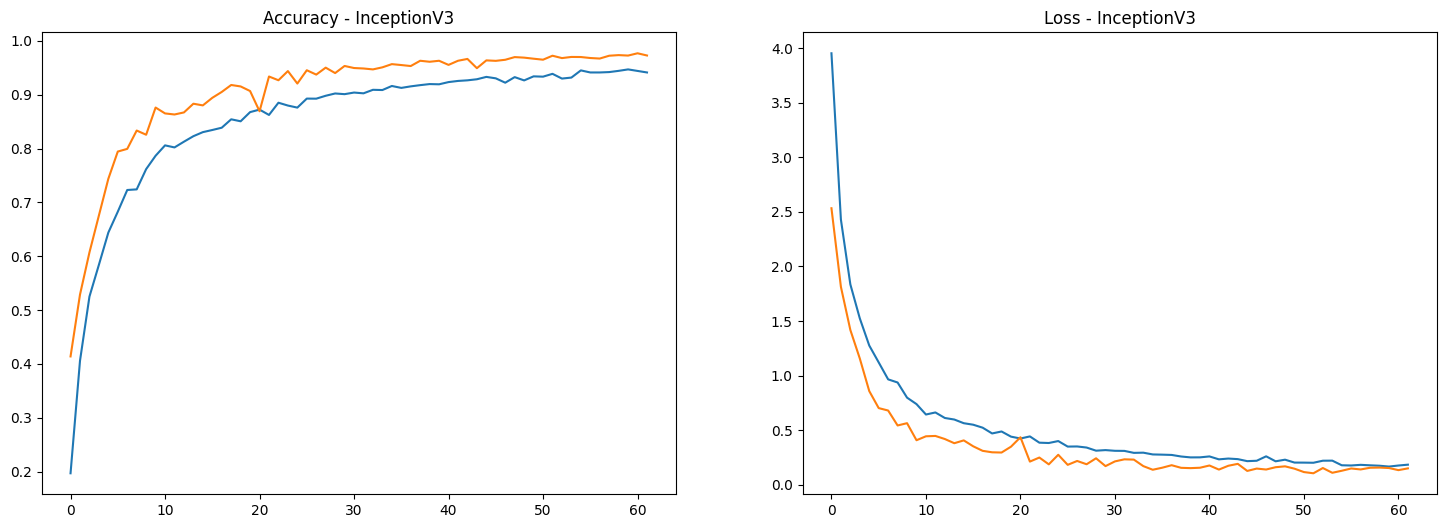

In [17]:
from tensorflow.keras.applications import InceptionV3

# Load the InceptionV3 model
inceptionv3_model = InceptionV3(input_shape=(224, 224, 3),
                                include_top=False,
                                weights='imagenet')

# Freeze the pre-trained model
inceptionv3_model.trainable = False

# Create a Sequential model and add layers
model_inceptionv3 = keras.Sequential([
    inceptionv3_model,
    layers.Flatten(),
    layers.Dense(units=1950, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(units=200, activation='softmax'),
])

model_inceptionv3.summary()

# Compile the model
model_inceptionv3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fit the model
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=10)
history_inceptionv3 = model_inceptionv3.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=100,
    verbose=1,
    callbacks=[early_stop]
)

# Plot results
result_inceptionv3 = pd.DataFrame(history_inceptionv3.history)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
ax = ax.flatten()
ax[0].plot(result_inceptionv3[['accuracy', 'val_accuracy']])
ax[0].set_title("Accuracy - InceptionV3")
ax[1].plot(result_inceptionv3[['loss', 'val_loss']])
ax[1].set_title("Loss - InceptionV3")
plt.show()

In [18]:
model_inceptionv3.evaluate(test_generator)

221/221 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.9738 - loss: 0.1130


[0.15123121440410614, 0.9728885889053345]

In [19]:
model_inceptionv3.save('bird_CNN_model_inceptionv3.h5')